# First simulated data

C:\Users\BIBER\AppData\Local\Temp\ipykernel_23528\3383512166.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=False, rug=True, color="r", ax=ax);


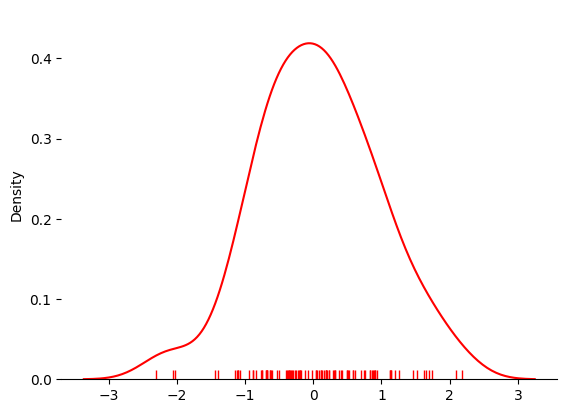

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

x = np.random.normal(size=100)

fig, ax = plt.subplots()
sns.despine(left=True)
sns.distplot(x, hist=False, rug=True, color="r", ax=ax);

C:\Users\BIBER\AppData\Local\Temp\ipykernel_23528\2831476620.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eps, hist=False, rug=True, color="r", ax=ax);


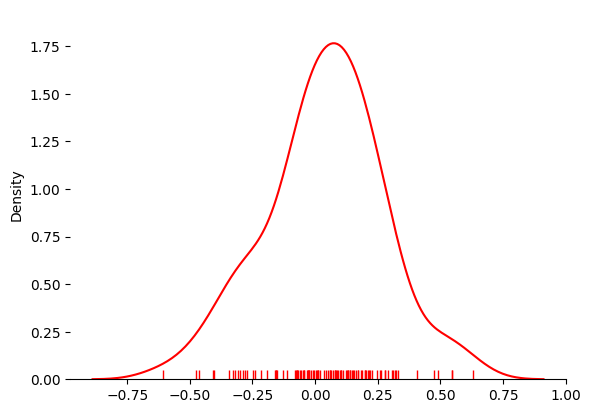

In [2]:
eps = np.random.normal(scale = .25, size=100)

fig, ax = plt.subplots()
sns.despine(left=True)
sns.distplot(eps, hist=False, rug=True, color="r", ax=ax);

In [3]:
y = -1 + .5*x + eps
print('Length of y = ' + str(len(y)))

Length of y = 100


Naturally, vector y has length 100, since it is a linear combination of 2 vectors of length 100.

In this model β0=−1
and β1=1/2.

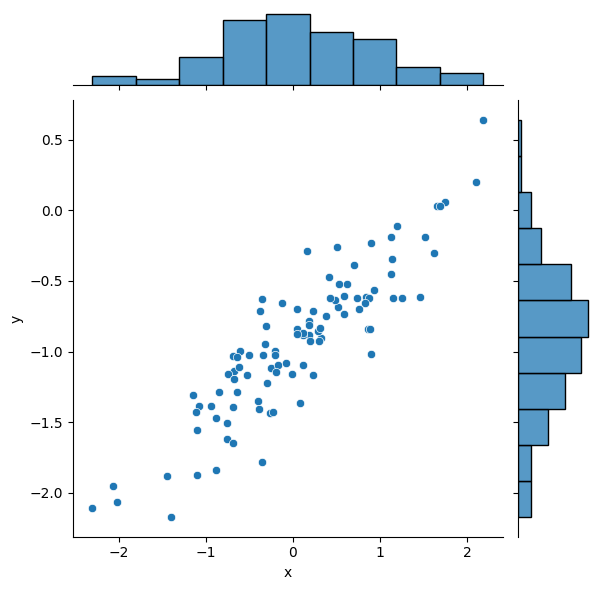

In [4]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df);

As expected, it does seem linear with a variance on the order of 0.5. No alarming indication of high leverage points or outliers.

In [5]:
import statsmodels.formula.api as smf

reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           5.39e-36
Time:                        01:49:03   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients of the regression are similar to the "true" values, although they are not equal (naturally). They fall within the 95% confidence interval in both cases.

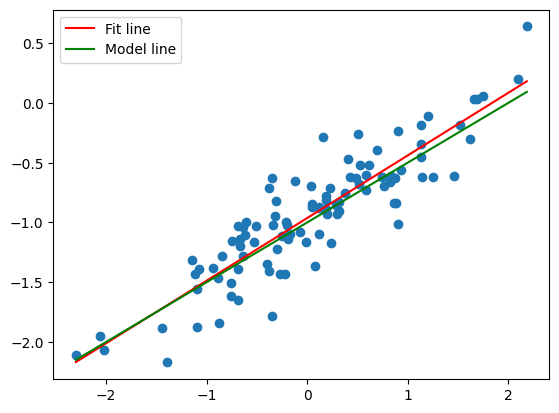

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis],y)


plt.scatter(df.x, df.y);

xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color='r');

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color='g');
plt.legend([fit, pop],['Fit line','Model line'])

In [7]:
reg = smf.ols('y ~ x + I(x**2)', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.32e-34
Time:                        01:49:05   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x              0.5234      0.027     19.582      0.000       0.470       0.576
I(x ** 2)      0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After fitting a model with basis functions X and X2, looking at the table above we can see that the p-value for the squared term is 0.856, so we can conclude that there is no evidence to reject the null hypothesis asserting the coefficient of the second order term is zero. In other words, there is no statistically significant relationship between X2 and Y - the quadratic term does not improve the model fit. This is also evident when comparing the R-squared of both fits. They are equal, even though the second model has an additional variable.

# With less variance in error term

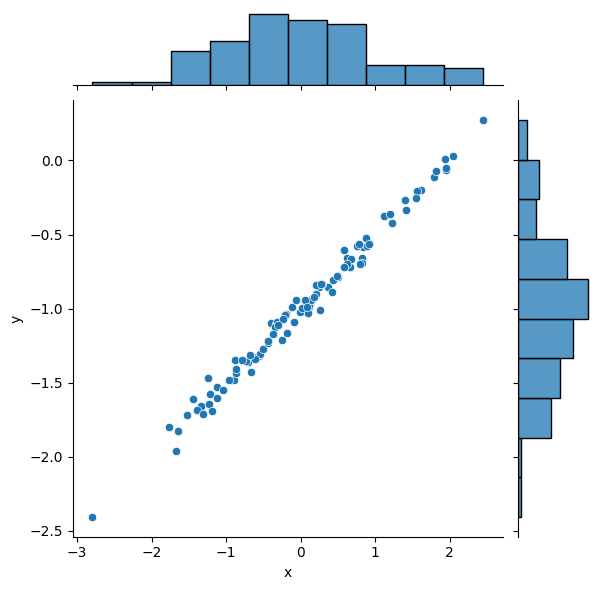

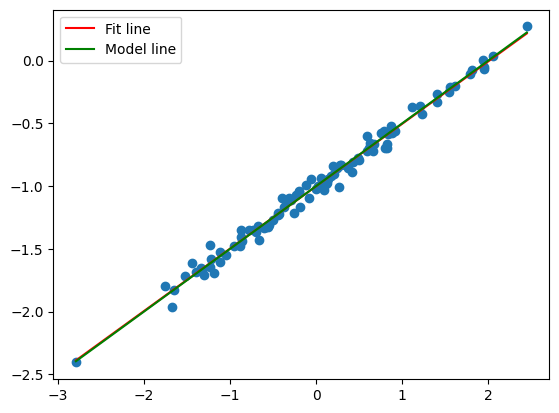

In [8]:
x = np.random.normal(size=100)
eps = np.random.normal(scale = .05, size=100)
y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis],y)

plt.subplots()
plt.scatter(df.x, df.y);


xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color='r');

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color='g');
plt.legend([fit, pop],['Fit line','Model line'])

In [9]:
reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8662.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.97e-97
Time:                        01:49:06   Log-Likelihood:                 151.58
No. Observations:                 100   AIC:                            -299.2
Df Residuals:                      98   BIC:                            -293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0010      0.005   -186.443      0.000      -1.012      -0.990
x              0.4972      0.005     93.071      0.000       0.487       0.508
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, we have a better fit, a better confidence intervals, and a higher R-squared.

Our model fits this data set better than the previous one that was generated from a noisier distribution.

# Increase variance in error term 

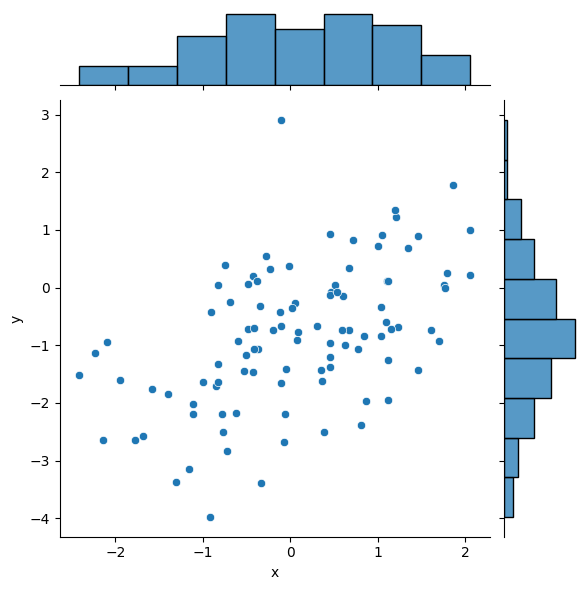

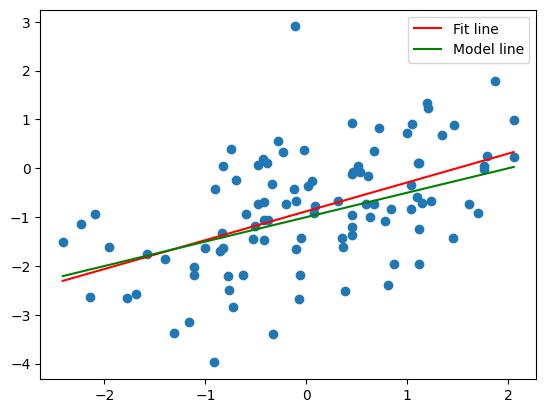

In [10]:
x = np.random.normal(size=100)
eps = np.random.normal(scale = 1, size=100)
y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

model = LinearRegression(fit_intercept= True)
model.fit(x[:, np.newaxis],y)

plt.subplots()
plt.scatter(df.x, df.y);


xfit = np.linspace(df.x.min(), df.x.max(), 100)
yfit = model.predict(xfit[:, np.newaxis])
fit, = plt.plot(xfit, yfit, color='r');

xpop = np.linspace(df.x.min(), df.x.max(), 100)
ypop = -1 + .5*xpop
pop, = plt.plot(xpop, ypop, color='g');
plt.legend([fit, pop],['Fit line','Model line'])

In [11]:
reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     33.96
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           7.19e-08
Time:                        01:49:14   Log-Likelihood:                -145.66
No. Observations:                 100   AIC:                             295.3
Df Residuals:                      98   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8802      0.105     -8.375      0.000      -1.089      -0.672
x              0.5903      0.101      5.828      0.000       0.389       0.791
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.566
Skew:                           0.192   Prob(JB):                        0.168
Kurtosis:                       3.842   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, on the other hand, we have a much worse fit. The R-squared is just 0.257 and the confidence intervals for the coefficients are much wider. Still there's no doubt we are in the presence of a statistically significant relationship, with very low p-values.